In [97]:
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler
import torch
from datasets.nuscenes import compile_data
%matplotlib inline
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToPILImage()])



In [89]:


model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

In [98]:
import yaml

with open("./configs/train_nuscenes_lss_baseline.yaml", 'r') as file:
    config = yaml.safe_load(file)

train_loader, val_loader = compile_data("trainval", config, shuffle_train=True, ood=True, seg=False)

Flipped: True
Dims: (128, 352)
../data/nuscenes/trainval
OOD labels: ['movable_object.barrier']
OOD labels: ['movable_object.barrier']


In [92]:
imgs, _, _, _, _, _, _, _, _ = train_loader.dataset[0]

In [93]:
img = imgs[1].permute(1, 2, 0)

In [94]:
pim = transform(img.permute(2, 0, 1))
print(pim.size)

(352, 128)


In [ ]:
edited = pipe("add a horse", image=pim).images[0]


  0%|          | 0/100 [00:00<?, ?it/s]

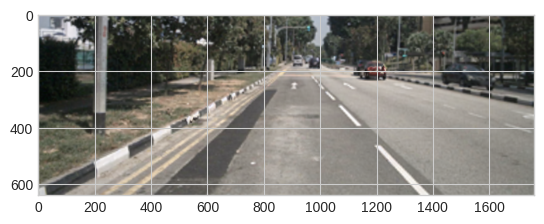

In [66]:
plt.imshow(edited)